In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [8]:
data = pd.read_csv('NFL Play by Play 2009-2017 (v4).csv')

In [231]:
data.head()


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


<h3>Зполнение пропущенных значений нулями</h3>

In [12]:

data_new = data.fillna(0)
data_new.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,0.0,15:00,15,3600.0,0.0,TEN,...,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


# Импьютация

In [17]:
miss_val_count = data.isnull().sum()
print(miss_val_count)

Date                                0
GameID                              0
Drive                               0
qtr                                 0
down                            61154
time                              224
TimeUnder                           0
TimeSecs                          224
PlayTimeDiff                      444
SideofField                       528
yrdln                             840
yrdline100                        840
ydstogo                             0
ydsnet                              0
GoalToGo                          840
FirstDown                       28811
posteam                         24992
DefensiveTeam                   24992
desc                                2
PlayAttempted                       0
Yards.Gained                        0
sp                                  0
Touchdown                           0
ExPointResult                  397578
TwoPointConv                   407083
DefTwoPoint                    407664
Safety      

In [21]:
num_cols = []
for col in data.columns:
    temp_nul = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_nul>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)

In [67]:
data_num = data[num_cols]
data_num.sample(300)

,down,TimeSecs,PlayTimeDiff,yrdln,yrdline100,GoalToGo,FirstDown,FieldGoalDistance,PosTeamScore,DefTeamScore,...,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA
181172,1.0,1580.0,32.0,45.0,55.0,0.0,0.0,NaN,14.0,10.0,...,-0.260187,0.000000,0.297979,0.702021,3.074145e-01,0.692586,0.702021,-0.009435,-0.009435,0.000000
351688,1.0,2816.0,39.0,22.0,22.0,0.0,0.0,NaN,0.0,3.0,...,NaN,NaN,0.465108,0.534892,4.773165e-01,0.522684,0.534892,-0.012209,NaN,NaN
212949,2.0,3552.0,38.0,47.0,47.0,0.0,0.0,NaN,0.0,0.0,...,-0.869131,1.028490,0.439327,0.560673,4.316399e-01,0.568360,0.560673,0.007687,-0.026850,0.034537
274281,3.0,1229.0,35.0,50.0,50.0,0.0,0.0,NaN,23.0,10.0,...,1.251600,-2.412467,0.908244,0.091756,8.929626e-01,0.107037,0.908244,-0.015281,0.015767,-0.031048
133654,1.0,510.0,9.0,49.0,49.0,0.0,0.0,NaN,3.0,7.0,...,NaN,NaN,0.434402,0.565598,4.246392e-01,0.575361,0.434402,-0.009763,NaN,NaN
56251,2.0,2783.0,40.0,8.0,92.0,0.0,1.0,NaN,3.0,17.0,...,NaN,NaN,0.096002,0.903998,1.283475e-01,0.871652,0.096002,0.032345,NaN,NaN
130221,1.0,2375.0,16.0,43.0,43.0,0.0,0.0,NaN,17.0,7.0,...,0.021913,-0.539834,0.869986,0.130014,8.623060e-01,0.137694,0.869986,-0.007680,0.000623,-0.008302
53741,4.0,1007.0,9.0,34.0,34.0,0.0,0.0,52.0,17.0,27.0,...,NaN,NaN,0.818940,0.181060,7.501889e-01,0.249811,0.181060,0.068751,NaN,NaN
182277,1.0,649.0,46.0,47.0,53.0,0.0,1.0,NaN,17.0,23.0,...,0.624907,0.580104,0.650042,0.349958,6.031637e-01,0.396836,0.349958,0.046878,0.024482,0.022396
73630,1.0,2902.0,30.0,48.0,48.0,0.0,0.0,NaN,7.0,0.0,...,0.961321,-1.533757,0.191636,0.808364,2.058942e-01,0.794106,0.808364,-0.014258,0.020878,-0.035136


In [68]:
data[data['Opp_Touchdown_Prob'].isnull()]

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
2717,2009-09-14,2009091401,20,4,NaN,NaN,4,NaN,NaN,OAK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
2719,2009-09-14,2009091401,20,4,NaN,NaN,4,NaN,NaN,OAK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
8673,2009-10-04,2009100401,26,5,NaN,15:00,15,0.0,0.0,CLE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
9409,2009-10-04,2009100405,20,4,NaN,09:26,10,566.0,5.0,NYG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
9410,2009-10-04,2009100405,20,4,NaN,09:26,10,566.0,0.0,NYG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
10760,2009-10-05,2009100500,18,4,NaN,03:40,4,220.0,9.0,MIN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
10761,2009-10-05,2009100500,18,4,NaN,03:40,4,220.0,0.0,MIN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
12083,2009-10-11,2009101100,13,3,NaN,00:52,1,952.0,9.0,BAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
15063,2009-10-18,2009101810,20,3,NaN,00:11,1,911.0,2.0,TEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
16717,2009-10-25,2009102508,11,2,NaN,NaN,6,NaN,NaN,NYJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009


In [35]:
index = data[data['Opp_Touchdown_Prob'].isnull()].index
index

Int64Index([  2717,   2719,   8673,   9409,   9410,  10760,  10761,  12083,
             15063,  16717,
            ...
            386537, 388811, 392181, 392461, 393123, 393864, 394156, 394453,
            396715, 397829],
           dtype='int64', length=176)

In [36]:
col_sum = {}
for col in data_num:
    sum = data[data[col].isnull()].shape[0]
    col_sum[col] = sum
print(col_sum)

{'down': 61154, 'TimeSecs': 224, 'PlayTimeDiff': 444, 'yrdln': 840, 'yrdline100': 840, 'GoalToGo': 840, 'FirstDown': 28811, 'FieldGoalDistance': 398740, 'PosTeamScore': 26904, 'DefTeamScore': 26904, 'ScoreDiff': 24988, 'AbsScoreDiff': 26904, 'No_Score_Prob': 176, 'Opp_Field_Goal_Prob': 176, 'Opp_Safety_Prob': 176, 'Opp_Touchdown_Prob': 176, 'Field_Goal_Prob': 176, 'Safety_Prob': 176, 'Touchdown_Prob': 176, 'ExpPts': 176, 'EPA': 369, 'airEPA': 248394, 'yacEPA': 248498, 'Home_WP_pre': 24954, 'Away_WP_pre': 24954, 'Home_WP_post': 26587, 'Away_WP_post': 26587, 'Win_Prob': 25009, 'WPA': 5541, 'airWPA': 248501, 'yacWPA': 248762}


In [41]:
data_num_Opp_Touchdown_Prob = data_num[['Opp_Touchdown_Prob']]
data_num_Opp_Touchdown_Prob.sample(50)

,Opp_Touchdown_Prob
267043,0.202544
194462,0.263079
221534,0.161765
248396,0.270218
279773,0.025394
202483,0.010439
326989,0.182623
299361,0.050353
263671,0.065604
262953,0.346360


In [42]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [45]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Opp_Touchdown_Prob)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [74]:
imp_num = SimpleImputer(missing_values=np.nan,strategy='mean')
imp_num.fit_transform(data_num[['TimeSecs']])
data_num[['TimeSecs']] = imp_num.fit_transform(data_num[['TimeSecs']])
data_num[data['TimeSecs'].isnull()]

C:\Users\MI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\MI\Anaconda3\lib\site-packages\pandas\core\frame.py:3144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\MI\Anaconda3\lib\site-packages\pandas\core\frame.py:3116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

,down,TimeSecs,PlayTimeDiff,yrdln,yrdline100,GoalToGo,FirstDown,FieldGoalDistance,PosTeamScore,DefTeamScore,...,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA
2717,NaN,1695.268944,NaN,42.0,42.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2719,NaN,1695.268944,NaN,47.0,47.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4564,NaN,1695.268944,NaN,23.0,23.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4621,NaN,1695.268944,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4661,NaN,1695.268944,NaN,48.0,48.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4723,NaN,1695.268944,NaN,43.0,43.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,1.0,0.0,NaN,0.0,NaN,NaN
7159,NaN,1695.268944,NaN,29.0,29.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
7213,NaN,1695.268944,NaN,20.0,20.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
7248,NaN,1695.268944,NaN,24.0,24.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
7304,NaN,1695.268944,NaN,29.0,29.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,0.0,1.0,0.0,1.0,NaN,0.0,NaN,NaN


In [93]:
strategies = ['mean','most','most_frequent']

def imputation(dataset,column,strategy_param):
    temp_data = dataset[[column]]
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    filled_data = data_num_imp[mask_missing_values_only]
    return (strategy_param,filled_data[0])

In [94]:
imputation(data,'Opp_Touchdown_Prob',strategies[0])

('mean', 0.1399725073483265)

In [237]:
cat_col = []
total_count = data.shape[0]
for col in data.columns:
    temp_cat = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_cat>0 and (dt == 'object'):
        cat_col.append(col)
    temp_perc = round((temp_cat / total_count) * 100.0, 2)
    print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt,temp_cat, temp_perc))


Колонка Date. Тип данных object. Количество пустых значений 0, 0.0%.
Колонка GameID. Тип данных int64. Количество пустых значений 0, 0.0%.
Колонка Drive. Тип данных int64. Количество пустых значений 0, 0.0%.
Колонка qtr. Тип данных int64. Количество пустых значений 0, 0.0%.
Колонка down. Тип данных float64. Количество пустых значений 61154, 15.0%.
Колонка time. Тип данных object. Количество пустых значений 224, 0.05%.
Колонка TimeUnder. Тип данных int64. Количество пустых значений 0, 0.0%.
Колонка TimeSecs. Тип данных float64. Количество пустых значений 224, 0.05%.
Колонка PlayTimeDiff. Тип данных float64. Количество пустых значений 444, 0.11%.
Колонка SideofField. Тип данных object. Количество пустых значений 528, 0.13%.
Колонка yrdln. Тип данных float64. Количество пустых значений 840, 0.21%.
Колонка yrdline100. Тип данных float64. Количество пустых значений 840, 0.21%.
Колонка ydstogo. Тип данных int64. Количество пустых значений 0, 0.0%.
Колонка ydsnet. Тип данных int64. Количество

In [107]:
cat_temp_data = data[['SideofField']]
cat_temp_data.head()

,SideofField
0,TEN
1,PIT
2,PIT
3,PIT
4,PIT


In [110]:
cat_temp_data['SideofField'].unique()

array(['TEN', 'PIT', 'MID', 'MIN', 'CLE', 'DET', 'NO', 'TB', 'DAL', 'NYJ',
       'HOU', 'JAC', 'IND', 'CIN', 'DEN', nan, 'PHI', 'CAR', 'BAL', 'KC',
       'MIA', 'ATL', 'SF', 'ARI', 'SEA', 'STL', 'WAS', 'NYG', 'CHI', 'GB',
       'BUF', 'NE', 'SD', 'OAK', '50', 'LA', 'JAX', 'LAC'], dtype=object)

In [120]:
print('неопределённые значения - {}'.format(cat_temp_data[cat_temp_data['SideofField'].isnull()].shape[0]))

неопределённые значения - 528


In [121]:
# импьютаця наиболее частыми знчениями
imp2 = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
cat_data_imp = imp2.fit_transform(cat_temp_data)
cat_data_imp

array([['TEN'],
       ['PIT'],
       ['PIT'],
       ...,
       ['BAL'],
       ['BAL'],
       ['BAL']], dtype=object)

In [133]:
# 'nan' in cat_data_imp
np.unique(cat_data_imp)

array(['50', 'ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE',
       'DAL', 'DEN', 'DET', 'GB', 'HOU', 'IND', 'JAC', 'JAX', 'KC', 'LA',
       'LAC', 'MIA', 'MID', 'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'OAK', 'PHI',
       'PIT', 'SD', 'SEA', 'SF', 'STL', 'TB', 'TEN', 'WAS'], dtype=object)

In [191]:
# cat_temp_data.loc[str(cat_temp_data['SideofField'].dtype) == 'np.nan']


# Преобразование категориальныз признаков в числовые

In [195]:
cat_encoded = pd.DataFrame({'c1':cat_data_imp.T[0]})
cat_encoded

,c1
0,TEN
1,PIT
2,PIT
3,PIT
4,PIT
5,TEN
6,TEN
7,TEN
8,TEN
9,TEN


In [197]:
#label encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [200]:
le = LabelEncoder()
cat_encoded_le = le.fit_transform(cat_encoded['c1'])

In [198]:
cat_encoded['c1'].unique()

array(['TEN', 'PIT', 'MID', 'MIN', 'CLE', 'DET', 'NO', 'TB', 'DAL', 'NYJ',
       'HOU', 'JAC', 'IND', 'CIN', 'DEN', 'OAK', 'PHI', 'CAR', 'BAL',
       'KC', 'MIA', 'ATL', 'SF', 'ARI', 'SEA', 'STL', 'WAS', 'NYG', 'CHI',
       'GB', 'BUF', 'NE', 'SD', '50', 'LA', 'JAX', 'LAC'], dtype=object)

In [204]:
np.unique(cat_encoded_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36])

In [206]:
le.inverse_transform(cat_encoded_le)

array(['TEN', 'PIT', 'PIT', ..., 'BAL', 'BAL', 'BAL'], dtype=object)

In [215]:
#one-hot encoding
one = OneHotEncoder()
cat_encoded_one = one.fit_transform(cat_encoded[['c1']])

In [216]:
cat_encoded.shape


(407688, 1)

In [217]:
cat_encoded_one.shape

(407688, 37)

In [218]:
cat_encoded_one

<407688x37 sparse matrix of type '<class 'numpy.float64'>'
	with 407688 stored elements in Compressed Sparse Row format>

In [221]:
cat_encoded_one.todense()[1:5]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0.]])

In [223]:
#pandas get dummies
pd.get_dummies(cat_encoded).head()

,c1_50,c1_ARI,c1_ATL,c1_BAL,c1_BUF,c1_CAR,c1_CHI,c1_CIN,c1_CLE,c1_DAL,...,c1_OAK,c1_PHI,c1_PIT,c1_SD,c1_SEA,c1_SF,c1_STL,c1_TB,c1_TEN,c1_WAS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [224]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,SideofField_50,SideofField_ARI,SideofField_ATL,SideofField_BAL,SideofField_BUF,SideofField_CAR,SideofField_CHI,SideofField_CIN,SideofField_CLE,SideofField_DAL,...,SideofField_PHI,SideofField_PIT,SideofField_SD,SideofField_SEA,SideofField_SF,SideofField_STL,SideofField_TB,SideofField_TEN,SideofField_WAS,SideofField_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# Масштабирование данных


In [225]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [248]:
#MinMax
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['airEPA']])
sc1_data

array([[       nan],
       [0.58333815],
       [       nan],
       ...,
       [0.52149434],
       [       nan],
       [       nan]])

<function matplotlib.pyplot.show(*args, **kw)>

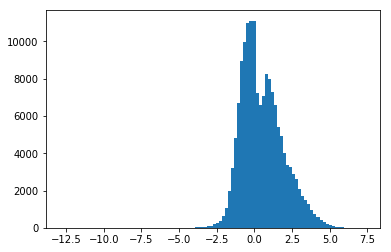

In [254]:
plt.hist(data['airEPA'],100)
plt.show

C:\Users\MI\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\MI\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<function matplotlib.pyplot.show(*args, **kw)>

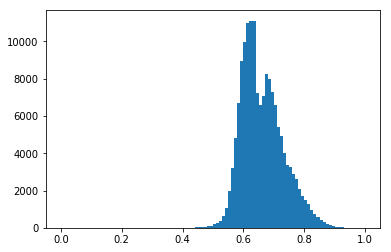

In [257]:
plt.hist(sc1_data,100)
plt.show

In [252]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['airEPA']])

C:\Users\MI\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\MI\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


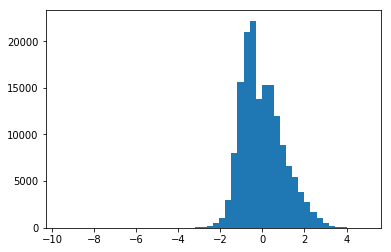

In [253]:
plt.hist(sc2_data, 50)
plt.show()

In [263]:
#Нормализация данных
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['ExpPts']].fillna(0))

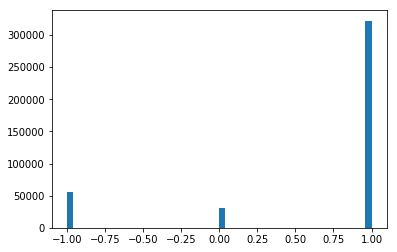

In [264]:
plt.hist(sc3_data, 50)
plt.show()